# BT3017 Tutorial 7

- There is an online copy<sup>+</sup> of this tutorial on github available [here](https://github.com/KohSiXing/Feature-Engineering-for-Machine-Learning/blob/master/BT3017%20Tutorial%207.ipynb)

<sup>+</sup> Online copy will only be published after Wednesday 1000 of that week to prevent plagiarism.

### Preprocessing



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sounddevice as sd
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt

### 1

- Play a tone of 1000Hz
- Using a sampling frequency of 44.1kHz, record the tone for 5 second and store the audio recording in a file.
- The `write` command from `scipy.io.wavfile` has been commented out to prevent accidental overwriting. Simply uncomment if there is a need to re-record the wavfiles

In [2]:
sFreq = 44100
duration = 5

In [3]:
# 1000 Hz
print("--- Recording ---")

recording = sd.rec(int(sFreq*duration), samplerate = sFreq, channels = 1)
sd.wait()
print("--- Done ---")
#write('tone1000Hz.wav', sFreq, recording)

--- Recording ---
--- Done ---


- Repeat the above for tones of 2000Hz, 5000Hz, 10000Hz. 

In [4]:
# 2000 Hz
print("--- Recording ---")
recording = sd.rec(int(sFreq*duration), samplerate = sFreq, channels = 1)
sd.wait()
print("--- Done ---")
#write('tone2000Hz.wav', sFreq, recording)

--- Recording ---
--- Done ---


In [5]:
# 5000 Hz
print("--- Recording ---")
recording = sd.rec(int(sFreq*duration), samplerate = sFreq, channels = 1)
sd.wait()
print("--- Done ---")
#write('tone5000Hz.wav', sFreq, recording)

--- Recording ---
--- Done ---


In [6]:
# 10000 Hz
print("--- Recording ---")
recording = sd.rec(int(sFreq*duration), samplerate = sFreq, channels = 1)
sd.wait()
print("--- Done ---")
#write('tone10000Hz.wav', sFreq, recording)

--- Recording ---
--- Done ---


### 2

### File of tone1000Hz

- read the file "tone1000Hz.wav"

In [7]:
samplerate, data = read('./tone1000Hz.wav')
data

array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
       -8.6669922e-03, -8.7890625e-03, -8.6364746e-03], dtype=float32)

In [8]:
samplerate

44100

- Graph of raw sound signals from the *tone1000Hz.wav* before FFT 

[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Amplitude')]

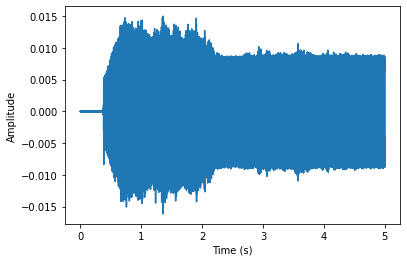

In [9]:
time = np.linspace(0, len(data)/samplerate, data.shape[0])
graph = sns.lineplot(x = time, y = data)
graph.set(xlabel = "Time (s)", ylabel = "Amplitude")

In [10]:
xf = fftfreq(samplerate * duration, 1/samplerate)
xf

array([ 0. ,  0.2,  0.4, ..., -0.6, -0.4, -0.2])

- Perform FFT on the audio signal

In [11]:
y = fft(data)
y

array([ 0.32632446-0.j        , -0.09509541-0.05101781j,
       -0.0748259 +0.18921554j, ...,  0.00805505+0.04176638j,
       -0.0748259 -0.18921554j, -0.09509541+0.05101781j], dtype=complex64)

- Plot the absolute value of the FFT results.

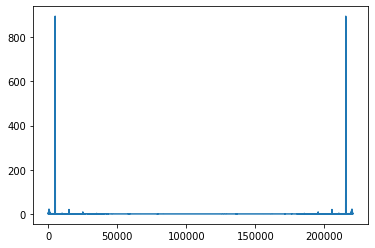

In [12]:
plt.plot(np.abs(y))

- Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above
- The indices identified are `[5000, 215500]`, which coincides with the index of the first 5000th and the last 5000th (or 220500 - 215500) positions respectively

In [13]:
np.where(np.abs(y) > 800)

(array([  5000, 215500], dtype=int64),)

- Compute the Frequency Resolution

$\Delta f = \frac{f_{s}}{N}$

In [14]:
FreqRes = samplerate / len(y)
FreqRes

0.2

- Verify that the peaks happened at the correct frequencies in Hz as expected.
- There is a graph of the centralized values (i.e. 0 Hz in the center), and the peak does fall at 1000Hz and -1000Hz

In [15]:
FreqRes * 5000

1000.0

In [16]:
FreqRes * (215500 - 220500)

-1000.0

[Text(0.5, 0, 'Frequency (Hz)'), Text(0, 0.5, 'Amplitude'), (-3000.0, 3000.0)]

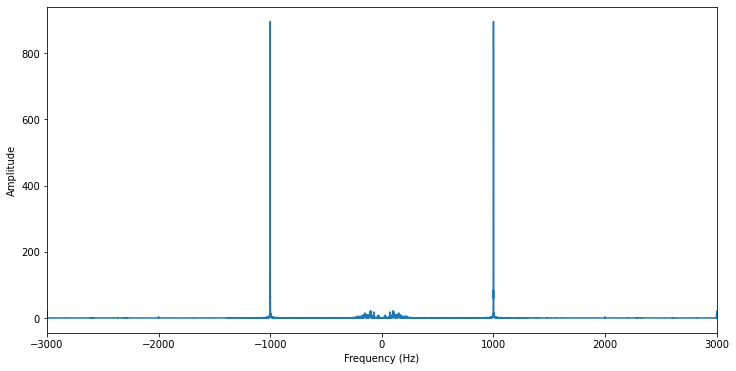

In [17]:
# Centralize the graph
freq = np.arange(len(np.abs(y))) / (len(data) / samplerate)
fig, ax = plt.subplots(figsize = (12,6))
graph = sns.lineplot(x = xf, y = np.abs(y), ax = ax)
graph.set(xlabel = "Frequency (Hz)", ylabel = "Amplitude", xlim = (-3000,3000))

### File of tone2000Hz
- read the file "tone2000Hz.wav"

In [18]:
samplerate, data = read('./tone2000Hz.wav')
data

array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
        6.1645508e-03,  5.7067871e-03,  4.7607422e-03], dtype=float32)

- Perform FFT on the audio signal

In [19]:
y = fft(data)
y

array([ 0.03970337-0.j        , -0.02309102-0.02103962j,
       -0.03536085+0.04817973j, ..., -0.04234535+0.00544152j,
       -0.03536085-0.04817973j, -0.02309102+0.02103962j], dtype=complex64)

- Plot the absolute value of the FFT results.

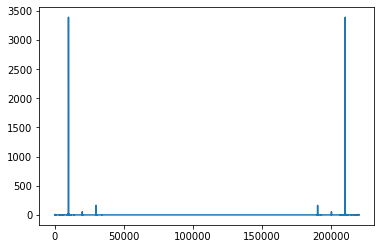

In [20]:
plt.plot(np.abs(y))

- Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above
- The indices identified are `[10000, 210500]`, which coincides with the index of the first 10000th and the last 10000th (or 220500 - 210500) positions respectively

In [21]:
np.where(np.abs(y) > 3000)

(array([ 10000, 210500], dtype=int64),)

- Frequency Resolution remains the same as above **0.2** since
    - Sampling Frequency : `44100 Hz` and 
    - Length of Data : `44100 Hz x 5s = 220500` remains constant

- Verify that the peaks happened at the correct frequencies in Hz as expected.
- There is a graph of the centralized values, and the peak does fall at 2000Hz and -2000Hz

In [22]:
FreqRes * 10000

2000.0

In [23]:
FreqRes * (210500 - 220500)

-2000.0

[Text(0.5, 0, 'Frequency (Hz)'), Text(0, 0.5, 'Amplitude'), (-3000.0, 3000.0)]

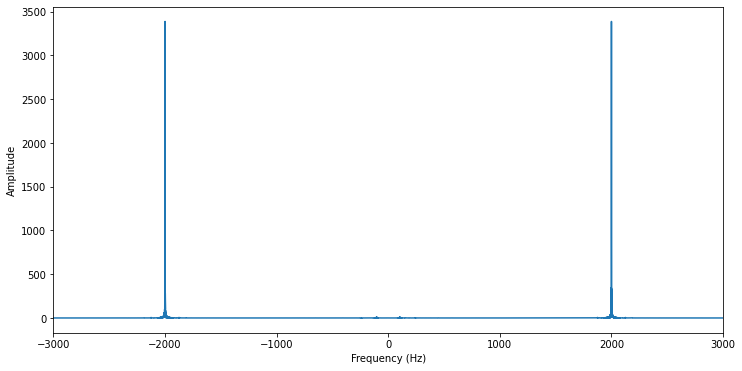

In [24]:
# Centralize the graph
freq = np.arange(len(np.abs(y))) / (len(data) / samplerate)
fig, ax = plt.subplots(figsize = (12,6))
graph = sns.lineplot(x = xf, y = np.abs(y), ax = ax)
graph.set(xlabel = "Frequency (Hz)", ylabel = "Amplitude", xlim = (-3000,3000))

### File of tone5000Hz

- read the file "tone5000Hz.wav"

In [25]:
samplerate, data = read('./tone5000Hz.wav')
data

array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
       -7.9956055e-03, -6.2866211e-03, -1.4343262e-03], dtype=float32)

- Perform FFT on the audio signal

In [26]:
y = fft(data)
y

array([ 0.03051758-0.j        , -0.01539613-0.00101518j,
        0.03931525+0.02006448j, ...,  0.01557019+0.01614536j,
        0.03931525-0.02006448j, -0.01539613+0.00101518j], dtype=complex64)

- Plot the absolute value of the FFT results.

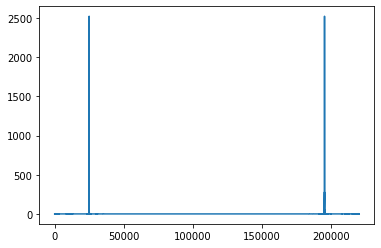

In [27]:
plt.plot(np.abs(y))

- Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above
- The indices identified are `[25000, 195500]`, which coincides with the index of the first 25000th and the last 25000th (or 220500 - 195500) positions respectively

In [28]:
np.where(np.abs(y) > 2000)

(array([ 25000, 195500], dtype=int64),)

- Frequency Resolution remains the same as above **0.2** since
    - Sampling Frequency : `44100 Hz` and 
    - Length of Data : `44100 Hz x 5s = 220500` remains constant

- Verify that the peaks happened at the correct frequencies in Hz as expected.
- There is a graph of the centralized values, and the peak does fall at 5000Hz and -5000Hz

In [29]:
FreqRes * 25000

5000.0

In [30]:
FreqRes * (195500 - 220500)

-5000.0

[Text(0.5, 0, 'Frequency (Hz)'), Text(0, 0.5, 'Amplitude'), (-6000.0, 6000.0)]

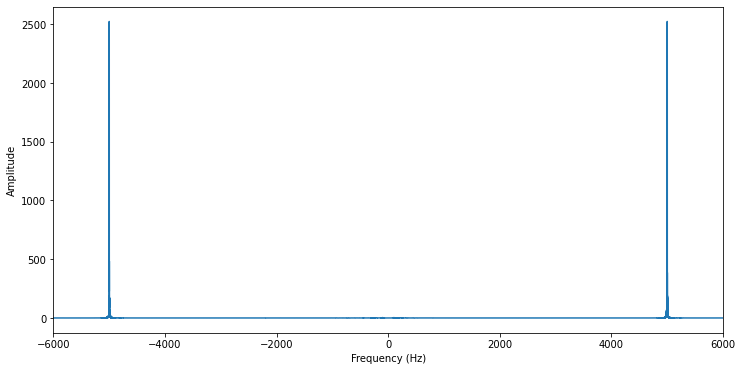

In [31]:
# Centralize the graph
freq = np.arange(len(np.abs(y))) / (len(data) / samplerate)
fig, ax = plt.subplots(figsize = (12,6))
graph = sns.lineplot(x = xf, y = np.abs(y), ax = ax)
graph.set(xlabel = "Frequency (Hz)", ylabel = "Amplitude", xlim = (-6000,6000))

### File of tone10000Hz

- Read the file "tone10000Hz.wav"

In [32]:
samplerate, data = read('./tone10000Hz.wav')
data

array([ 0.05072021, -0.2574463 , -0.14041138, ...,  0.23828125,
       -0.16400146, -0.23361206], dtype=float32)

- Perform FFT on the audio signal

In [33]:
y = fft(data)
y

array([-37.18686  -0.j       , -49.63978  +0.5154067j,
       -29.91023 +10.011353j , ..., -58.215397-47.146404j ,
       -29.91023 -10.011353j , -49.63978  -0.5154067j], dtype=complex64)

- Plot the absolute value of the FFT results.

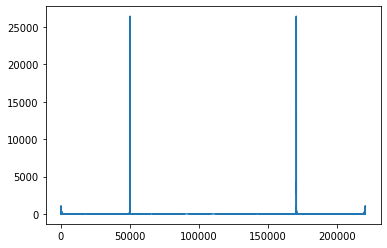

In [34]:
plt.plot(np.abs(y))

- Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above
- The indices identified are `[50001, 170499]`, which coincides with the index of the first 50001st and the last 50001st (or 242688 - 170499) position respectively.

In [35]:
np.where(np.abs(y) > 25000)

(array([ 50001, 170499], dtype=int64),)

- Frequency Resolution remains the same as above **0.2** since
    - Sampling Frequency : `44100 Hz` and 
    - Length of Data : `44100 Hz x 5s = 220500` remains constant

In [36]:
FreqRes = samplerate / len(data)
FreqRes

0.2

- Verify that the peaks happened at the correct frequencies in Hz as expected.
- There is a graph of the centralized values, and the peak does falls at 10000Hz and -10000Hz. 
- The indicies of the peaks are just off by 1 index, which is still within expectation. When integer casting is used, the dominant frequencies are still 10000Hz and -10000Hz

In [37]:
int(FreqRes * 50001)

10000

In [38]:
int(FreqRes * (170499 - 220500))

-10000

[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Amplitude'),
 (-12000.0, 12000.0)]

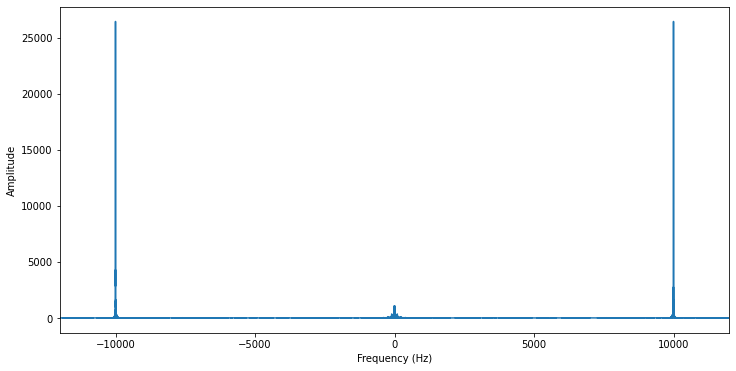

In [39]:
# Centralize the graph
freq = np.arange(len(np.abs(y))) / (len(y) / samplerate)
fig, ax = plt.subplots(figsize = (12,6))
graph = sns.lineplot(x = xf, y = np.abs(y), ax = ax)
graph.set(xlabel = "Frequency (Hz)", ylabel = "Amplitude", xlim = (-12000,12000))

#### References

<sup>[1]</sup> Coding With Evan. (2021, May 3). Voice recorder with python - youtube. Voice Recorder With Python. Retrieved March 17, 2022, from https://www.youtube.com/watch?v=HT5w-HNcr5A <br />
<sup>[2]</sup> Bechtold, B., &amp; Geier, M. (2015). Soundfile. SoundFile. Retrieved March 17, 2022, from https://pysoundfile.readthedocs.io/en/latest/ <br />
<sup>[3]</sup> MacLeod, C. (2021, June 26). Fourier transforms with scipy.fft: Python Signal Processing. Real Python. Retrieved March 17, 2022, from https://realpython.com/python-scipy-fft/ <br />
<sup>[4]</sup> Matplotlib Development Team. (2012). Creating multiple subplots using plt.subplots. Creating multiple subplots using plt.subplots - Matplotlib 3.5.1 documentation. Retrieved March 17, 2022, from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html <br />
<sup>[5]</sup> Kong, Q. K., Siauw, T., &amp; Bayen, A. (2020). FFT in python — python numerical methods. FFT in Python. Retrieved March 17, 2022, from https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html 

#### Previous Test Runs

- The original tests uses 2 channels (left & right), as such when `FTT` is to be performed, we must perform it channel by channel. 

- Below is an example of performing `FTT` using sound data recorded with 2 channels for the file *tone1000Hz2Channels.wav*
    - samplerate: `44100Hz`
    - duration: `5s`

In [40]:
samplerate, data = read('./tone1000Hz2Channels.wav')
duration = 5
data

array([[ 0.0000000e+00,  0.0000000e+00],
       [-3.0517578e-05,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       ...,
       [-4.3640137e-03, -3.3264160e-03],
       [-1.8310547e-04,  9.1552734e-04],
       [ 2.7160645e-03,  3.7841797e-03]], dtype=float32)

- Ploting the graph of both the raw left and right channels

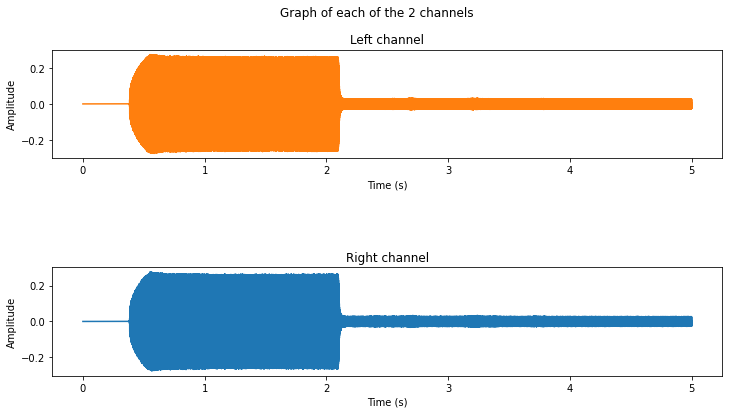

In [41]:
time = np.linspace(0., len(data)/samplerate, data.shape[0])

fig, axs = plt.subplots(2, figsize = (12,6))
plt.subplots_adjust(hspace=1)
fig.suptitle('Graph of each of the 2 channels')

axs[0].plot(time, data[:, 0], "tab:orange")
axs[1].plot(time, data[:, 1], "tab:blue")

axs[0].set_title("Left channel")
axs[1].set_title("Right channel")


for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='Amplitude')

In [42]:
xf = fftfreq(samplerate * duration, 1/samplerate)
xf

array([ 0. ,  0.2,  0.4, ..., -0.6, -0.4, -0.2])

In [43]:
# Taking data from the left channel first
y = fft(data[:,0])
y

array([ 0.18743896-0.j        , -0.37821746+0.44358903j,
       -0.04323466+0.12659252j, ..., -0.26319146-0.36522287j,
       -0.04323466-0.12659252j, -0.37821746-0.44358903j], dtype=complex64)

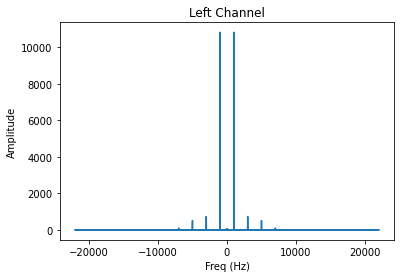

In [44]:
# Find the peaks in the graph to determine which is the dominant frequency in the soundfile
plt.plot(xf, np.abs(y))
plt.title("Left Channel")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.show()

- Looking only at the positive region, we can see that the peak for the left channel is at `1000Hz` which is the frequency recorded for the file *tone1000Hz.wav*

(0.0, 5000.0)

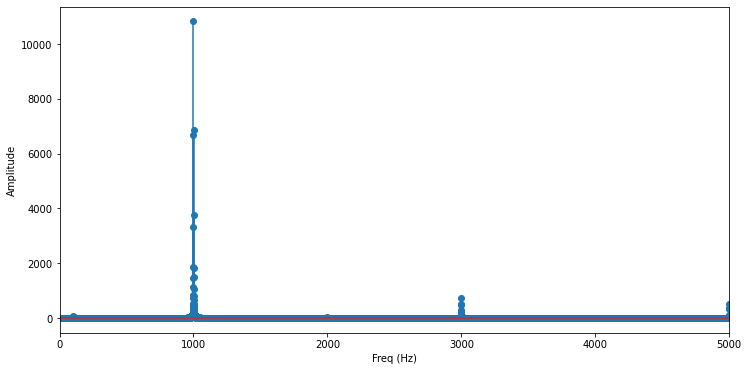

In [45]:
N = len(y)
n = np.arange(N)
T = N/samplerate
freq = n/T 

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(y))
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5000)

In [46]:
# Taking data from the right channel now
y = fft(data[:,1])
y

array([ 0.29135132-0.j        , -0.43944296+0.57395947j,
       -0.02930029-0.03268345j, ..., -0.24670622-0.31886446j,
       -0.02930029+0.03268345j, -0.43944296-0.57395947j], dtype=complex64)

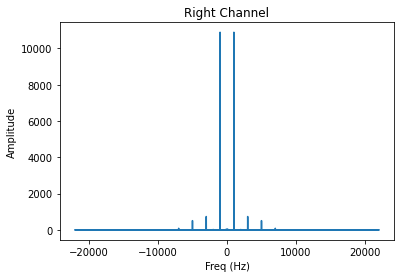

In [47]:
# Find the peaks in the graph to determine which is the dominant frequency in the soundfile
plt.plot(xf, np.abs(y))
plt.title("Right Channel")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.show()

- Looking only at the positive region, we can see that the peak for the right channel is at `1000Hz` which is the frequency recorded for the file *tone1000Hz.wav*

(0.0, 5000.0)

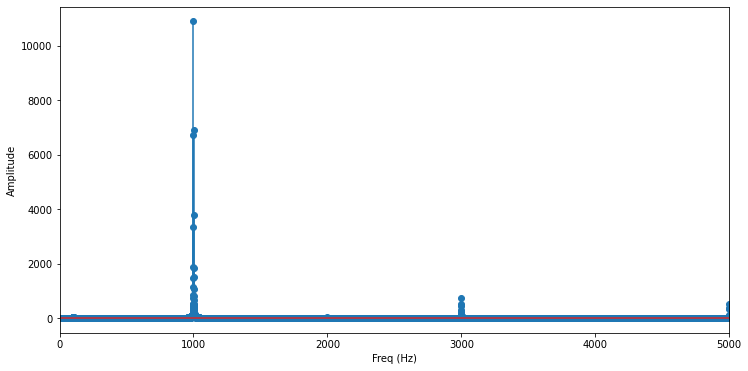

In [48]:
N = len(y)
n = np.arange(N)
T = N/samplerate
freq = n/T 

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(y))
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5000)